# Assignment 4
Roll Number : **CO23BTECH11021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1
Solving the transient heat conduction equation $$ \frac{\partial u}{\partial t} = \frac{\partial^2u}{\partial x^2} + cos^2\left(\frac{\pi x}{2}\right)$$ <br> 
where &ensp;$0 \leq x \leq 1$&ensp;and&ensp;$0 < t \leq 1$. 
1) Boundary Condition : &ensp;$u(0,t) = 0$&ensp;and&ensp;$\frac{\partial u}{\partial x}|_{x = 1} = 0$
2) Initial Condition : &ensp;$u(x,0) = 0$ <br>

Roll Number : CO23BTECH110**21** \
Odd Number &ensp;$\implies$&ensp;**Explicit Scheme** \
Using **FTCS** scheme with step sizes &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.005$ $\implies$ \
$$ Fo = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{0.005}{(0.1)^2} = 0.5$$ \
Since &ensp;$Fo \leq 0.5$;&ensp; the solution is stable. \
At point &ensp;$(i,n) \implies$ $$ u_i^{n + 1} = Fo(u_{i - 1}^n) + (1 - 2Fo)u_i^n + Fo(u_{i + 1}^n)$$

In [2]:
def boundary_conditions_1(u):
    '''
    Input :- 
      u :: Matrix of solutions.
    '''
    u[:,0] = 0                           # Left Boundary 

    u[0,:] = 0                           # initial condition

    return u

In [3]:
dx_1 = 0.1
dt_1 = 0.005

alpha_1 = 1
Fo_1 = (alpha_1 * dt_1) / (dx_1)**2

x_start_1 = 0
x_end_1 = 1

t_start_1 = 0
t_end_1 = 1

nx_1 = int(np.round((x_end_1 - x_start_1) / dx_1)) + 1
nt_1 = int(np.round((t_end_1 - t_start_1) / dt_1)) + 1

x_1 = np.linspace(x_start_1,x_end_1,nx_1)
t_1 = np.linspace(t_start_1,t_end_1,nt_1)

print("The Fourier Number is : ",Fo_1)

The Fourier Number is :  0.4999999999999999


In [4]:
u_1 = np.zeros((nt_1,nx_1))
u_1 = boundary_conditions_1(u_1)

for i in range(nt_1 - 1):
    for j in range(1,nx_1 - 1):
        u_1[i + 1, j] = Fo_1 * u_1[i, j - 1] + (1 - 2*Fo_1) * u_1[i, j] + Fo_1 * u_1[i, j + 1] + dt_1 * (np.cos((np.pi * x_1[j])/2))**2

    u_1[i + 1, nx_1 - 1] = 2 * Fo_1 * u_1[i, j - 1] + (1 - 2*Fo_1) * u_1[i, j] + dt_1 * (np.cos((np.pi * x_1[nx_1 - 1])/2))**2

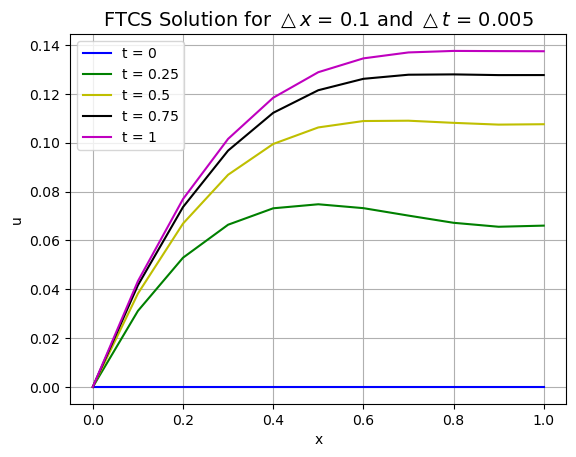

In [5]:
plt.title(rf"FTCS Solution for $\triangle x$ = {dx_1} and $\triangle t$ = {dt_1}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_1,u_1[0,:],c = 'b',label = 't = 0')
plt.plot(x_1,u_1[50,:],c = 'g',label = 't = 0.25')
plt.plot(x_1,u_1[100,:],c = 'y',label = 't = 0.5')
plt.plot(x_1,u_1[150,:],c = 'k',label = 't = 0.75')
plt.plot(x_1,u_1[200,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

Steady State Solution $\implies$ <br>
$$ \frac{\partial^2u}{\partial x^2} + cos^2\left(\frac{\pi x}{2}\right) = 0$$ \
Now this is a 2nd order ODE with the boundary conditions :
1) u(0) = 0
2) $\frac{\partial u}{\partial x} = 0$&ensp;at&ensp;$x = 1$.
The **discretized equation** now becomes $$ u_{i + 1} - 2u_i + u_{i - 1} =  -(\triangle x)^2cos^2\left(\frac{\pi x}{2}\right)$$

In [6]:
A_1 = np.zeros((nx_1,nx_1))
b_1 = np.zeros((nx_1,1))

u_1_ss = np.zeros((nx_1,1))

A_1[0,0] = 1

for i in range(1,nx_1 - 1):
    A_1[i,i] = -2
    A_1[i, i - 1] = 1
    A_1[i, i + 1] = 1

A_1[nx_1 - 1, nx_1 - 2] = 2
A_1[nx_1 - 1, nx_1 - 1] = -2

for j in range(1, nx_1):
    b_1[j,0] = -((dx_1) * np.cos((np.pi * x_1[j])/2))**2

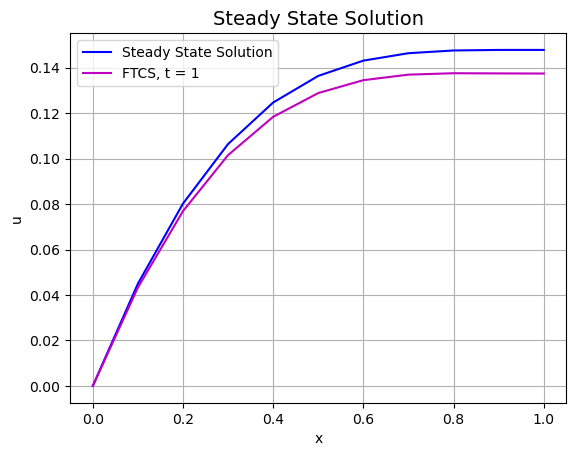

In [7]:
u_1_ss = np.linalg.solve(A_1,b_1)

plt.title(rf"Steady State Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_1,u_1_ss,c = 'b',label = 'Steady State Solution')
plt.plot(x_1,u_1[200,:],c = 'm',label = 'FTCS, t = 1')
plt.legend()
plt.grid()
plt.show()

**Observation** \
We can observe that the solution obtained using FTCS at &ensp;$t = 1$&ensp; is almost close to the Steady State solution obtained.

## Question 2
Solving the transient heat conduction equation $$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} - u$$ \
where &ensp;$0 \leq x \leq 1$&ensp;and&ensp;$ 0 < t \leq 0$. 
1) Boundary condition : &ensp;$u(0,t) = 1$&ensp;and&ensp;$\frac{\partial u}{\partial x}|_{x = 1} = 0$
2) Initial condition : &ensp;$u(x,0) = 1$

Roll Number : CO23BTECH110**21** \
Odd Number &ensp;$\implies$&ensp;Explicit Scheme \
Using **FTCS** scheme \
The discretized equation is $$ u_i^{n + 1} = Fo(u_{i - 1}^n) + (1 - 2Fo - \triangle t)u_i^n + Fo(u_{i + 1}^n)$$ \
Solving for **stability** $\implies$ $0 \leq 4Fo + \triangle t \leq 2$ \
\
For the values &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.004 \implies$ \
$$ Fo = \alpha \frac{\triangle t}{(\triangle x)^2} = \frac{0.004}{(0.1)^2} = 0.4 $$ \
$$ (4Fo + \triangle t) = 4 \times 0.4 + 0.004 = 1.6 + 0.004 = 1.604 \leq 2$$ \
Hence the solution should be stable.

In [8]:
def boundary_conditions_2(u):
    '''
    Input :- 
      u :: Matrix of solutions.
    '''
    u[:,0] = 1                           # Left Boundary 

    u[0,:] = 1                           # initial condition

    return u

In [9]:
dx_2 = 0.1
dt_2 = 0.004

alpha_2 = 1
Fo_2 = (alpha_2 * dt_2) / (dx_2)**2

x_start_2 = 0
x_end_2 = 1

t_start_2 = 0
t_end_2 = 1

nx_2 = int(np.round((x_end_2 - x_start_2) / dx_2)) + 1
nt_2 = int(np.round((t_end_2 - t_start_2) / dt_2)) + 1

x_2 = np.linspace(x_start_2,x_end_2,nx_2)
t_2 = np.linspace(t_start_2,t_end_2,nt_2)

print("The Fourier Number is : ",Fo_2)

The Fourier Number is :  0.3999999999999999


In [10]:
u_2 = np.zeros((nt_2,nx_2))
u_2 = boundary_conditions_2(u_2)

for i in range(nt_2 - 1):
    for j in range(1,nx_2 - 1):
        u_2[i + 1, j] = Fo_2 * u_2[i, j - 1] + (1 - 2*Fo_2 - dt_2) * u_2[i, j] + Fo_2 * u_2[i, j + 1]

    u_2 [i + 1, nx_2 - 1] = 2 * Fo_2 * u_2[i, j - 1] + (1 - 2*Fo_2 - dt_2) * u_2[i, j]

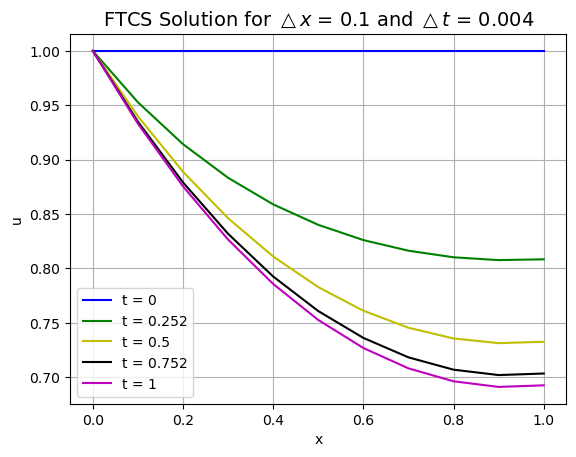

In [11]:
plt.title(rf"FTCS Solution for $\triangle x$ = {dx_2} and $\triangle t$ = {dt_2}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_2,u_2[0,:],c = 'b',label = 't = 0')
plt.plot(x_2,u_2[63,:],c = 'g',label = 't = 0.252')
plt.plot(x_2,u_2[125,:],c = 'y',label = 't = 0.5')
plt.plot(x_2,u_2[188,:],c = 'k',label = 't = 0.752')
plt.plot(x_2,u_2[250,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

Steady State Solution $\implies$ <br>
$$ \frac{\partial^2u}{\partial x^2} - u = 0$$ \
Now this is a 2nd order ODE with the boundary conditions :
1) u(0) = 1
2) $\frac{\partial u}{\partial x} = 0$&ensp;at&ensp;$x = 1$.
The **discretized equation** now becomes $$ u_{i + 1} - (2 + (\triangle x)^2)u_i + u_{i - 1} = 0$$

In [12]:
A_2 = np.zeros((nx_2,nx_2))
b_2 = np.zeros((nx_2,1))

u_2_ss = np.zeros((nx_2,1))

A_2[0,0] = 1
b_2[0,0] = 1

for i in range(1,nx_2 - 1):
    A_2[i,i] = -(2 + (dx_2)**2) 
    A_2[i, i - 1] = 1
    A_2[i, i + 1] = 1

A_2[nx_2 - 1, nx_2 - 2] = 2
A_2[nx_2 - 1, nx_2 - 1] = -(2 + (dx_2)**2)

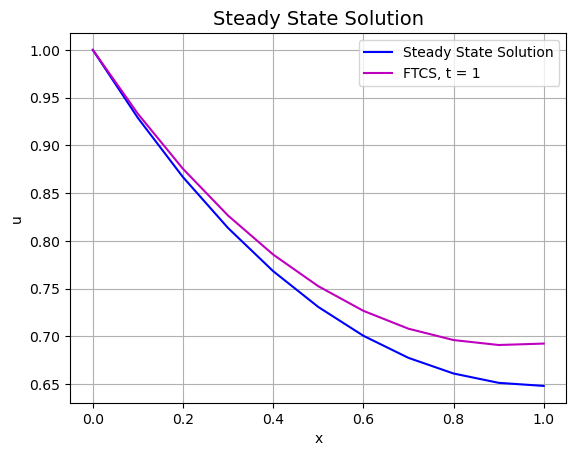

In [13]:
u_2_ss = np.linalg.solve(A_2,b_2)

plt.title(rf"Steady State Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_2,u_2_ss,c = 'b',label = 'Steady State Solution')
plt.plot(x_2,u_2[250,:],c = 'm',label = 'FTCS, t = 1')
plt.legend()
plt.grid()
plt.show()

**Observation** \
We can observe that the solution obtained using FTCS at &ensp;$t = 1$&ensp; is approaching the Steady State Solution.

## Question 3
Given, \
&emsp;&emsp;Medium width (L) &ensp;= &ensp;$10$&nbsp;$cm$ \
&emsp;&emsp;Thermal Diffusivity ($\alpha$) &ensp;= &ensp;$10^{-5}$&nbsp;$m^2/s = 0.1$&nbsp;$cm^2/s$ \
&emsp;&emsp;Advection Velocity (a) &ensp;= &ensp;$0.04$&nbsp;$cm/s$ \
\
Initial Condition : 
1) **Linear variation** of temperature from&ensp;$30 \degree C$&ensp;to&ensp;$60 \degree C$ 
2) Temperatue at the ends remain the same. 

Advection Diffusion Equation : $$ \frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = \alpha \frac{\partial^2 u}{\partial x^2}$$ \
Using **Operator Approach** &ensp;$\implies$ \
The discretized equation is $$ u_i^{n + 1} = \left(Fo + C \right)u_{i - 1}^n + \left(1 - 2Fo - C \right)u_i^n + \left(Fo \right)u_{i + 1}^n$$ \
\
The condition for **Stability** &ensp;$\implies$ $$ \left(2Fo + C \right) \leq 1$$ \
For &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.04$ \
$$ Fo = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{0.1 \times 0.04}{0.1^2} = 0.1 \times 4 = 0.4$$
$$ C = \frac{a \triangle t}{\triangle x} = \frac{0.04 \times 0.04}{0.1} = 0.4 \times 0.04 = 0.016$$
$$ \left(2Fo + C \right) = 0.8 + 0.016 = 0.816 \leq 1$$ \
Hence the scheme should be stable.

In [14]:
def boundary_conditions_3(u, x):
    '''
    Inputs :- 
      u :: Solution Matrix 
      x :: Space domain
    '''
    u[:,0] = 30                          # left boundary
    u[:,-1] = 60                         # right boundary

    u[0,:] = 30 + 3 * x                  # initial Condition

    return u

In [15]:
dx_3 = 0.1
dt_3 = 0.04

a_3 = 0.04
alpha_3 = 0.1
Fo_3 = (alpha_3 * dt_3) / (dx_3)**2
C_3 = (a_3 * dt_3) / (dx_3)

x_start_3 = 0
x_end_3 = 10

t_start_3 = 0
t_end_3 = 100

nx_3 = int(np.round((x_end_3 - x_start_3) / dx_3)) + 1
nt_3 = int(np.round((t_end_3 - t_start_3) / dt_3)) + 1

x_3 = np.linspace(x_start_3,x_end_3,nx_3)
t_3 = np.linspace(t_start_3,t_end_3,nt_3)

print("The Courant Number is : ",C_3)
print("The Fourier Number is : ",Fo_3)

The Courant Number is :  0.016
The Fourier Number is :  0.3999999999999999


In [16]:
u_3 = np.zeros((nt_3, nx_3))
u_3 = boundary_conditions_3(u_3, x_3)

for i in range(nt_3 - 1):
    for j in range(1,nx_3 - 1):
        u_3[i + 1, j] = (Fo_3 + C_3) * u_3[i, j - 1] + (1 - 2*Fo_3 - C_3) * u_3[i, j] + (Fo_3) * u_3[i, j + 1]

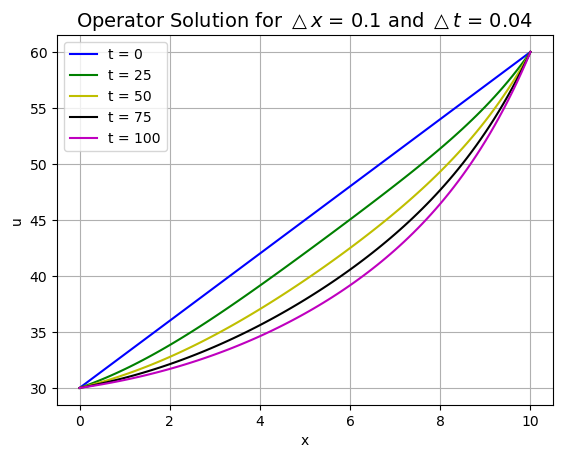

In [17]:
plt.title(rf"Operator Solution for $\triangle x$ = {dx_3} and $\triangle t$ = {dt_3}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_3,u_3[0,:],c = 'b',label = 't = 0')
plt.plot(x_3,u_3[625,:],c = 'g',label = 't = 25')
plt.plot(x_3,u_3[1250,:],c = 'y',label = 't = 50')
plt.plot(x_3,u_3[1875,:],c = 'k',label = 't = 75')
plt.plot(x_3,u_3[2500,:],c = 'm',label = 't = 100')
plt.legend()
plt.grid()
plt.show()

## Question 4
Given \
Width of the medium(L) &ensp;=&ensp; $0.2$&nbsp;$m$ \
Thermal Diffusivity($\alpha$) &ensp;= &ensp;$10^{-4}$&nbsp;$m^2/s$ \
Advection velocity(a) &ensp;=&ensp; $0.01$&nbsp;$m/s$ \
The initial temperature is **linearly** varying from $30 \degree C$&ensp;to&ensp;$100 \degree C$. \
\
The expression for **Peclet** Number is $$ Pe = \frac{La}{\alpha} = \frac{0.2 \times 0.01}{10^{-4}} = 20$$ <br> 
The value of &ensp;$Pe >> 1$&ensp;$\implies$&ensp; the equation is **Advection Dominant**.
\
Reason : Peclet Number is defined as the ratio of relative energy transfer through Advection to that of Diffusion. 
$$ Pe = \frac{\text{Relative energy transfer through Advection}}{\text{Relative energy transfer through Diffusion}}$$ <br>
Hence **Pe >> 1** suggests that the Advection is dominant over Diffusion. \
\
Using **Operator Approach** $\implies$ \
The discretized equation is $$ u_i^{n + 1} = \left(Fo + C \right)u_{i - 1}^n + \left(1 - 2Fo - C \right)u_i^n + \left(Fo \right)u_{i + 1}^n$$ \
\
The condition for **Stability** &ensp;$\implies$ $$ \left(2Fo + C \right) \leq 1$$ \
For &ensp;$\triangle x = 0.02$&ensp;and&ensp;$\triangle t = 0.1$ \
$$ Fo = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{10^{-4} \times 0.1}{0.02^2} = \frac{10^{-4} \times 0.1}{4 \times 10^{-4}} = 0.25$$
$$ C = \frac{a \triangle t}{\triangle x} = \frac{0.01 \times 0.1}{0.02} = 0.5 \times 0.1 = 0.05$$
$$ \left(2Fo + C \right) = 0.5 + 0.05 = 0.55 \leq 1$$ \
Hence the scheme should be stable.

In [18]:
def boundary_conditions_4(u, x):
    '''
    Inputs :- 
      u :: Solution Matrix 
      x :: Space domain
    '''
    u[:,0] = 30                           # left boundary
    u[:,-1] = 100                         # right boundary

    u[0,:] = 30 + 350 * x                 # Initial condition

    return u

In [19]:
dx_4 = 0.02
dt_4 = 0.1

a_4 = 0.01
alpha_4 = 1e-4
Fo_4 = (alpha_4 * dt_4) / (dx_4)**2
C_4 = (a_4 * dt_4) / (dx_4)

x_start_4 = 0
x_end_4 = 0.2

t_start_4 = 0
t_end_4 = 1

nx_4 = int(np.round((x_end_4 - x_start_4) / dx_4)) + 1
nt_4 = int(np.round((t_end_4 - t_start_4) / dt_4)) + 1

x_4 = np.linspace(x_start_4,x_end_4,nx_4)
t_4 = np.linspace(t_start_4,t_end_4,nt_4)

print("The Courant Number is : ",C_4)
print("The Fourier Number is : ",Fo_4)

The Courant Number is :  0.05
The Fourier Number is :  0.025


In [20]:
u_4 = np.zeros((nt_4, nx_4))
u_4 = boundary_conditions_4(u_4, x_4)

for i in range(nt_4 - 1):
    for j in range(1,nx_4 - 1):
        u_4[i + 1, j] = (Fo_4 + C_4) * u_4[i, j - 1] + (1 - 2*Fo_4 - C_4) * u_4[i, j] + (Fo_4) * u_4[i, j + 1]

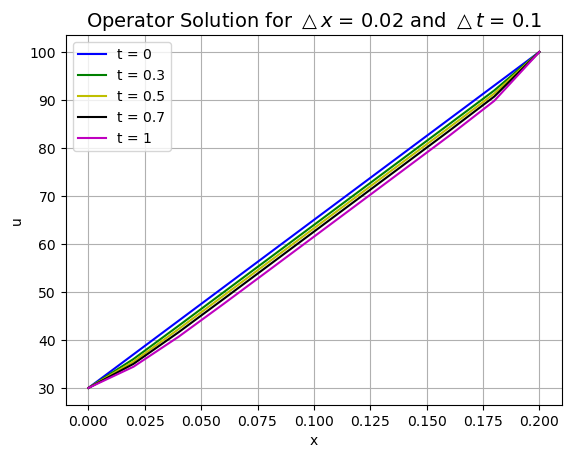

In [21]:
plt.title(rf"Operator Solution for $\triangle x$ = {dx_4} and $\triangle t$ = {dt_4}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_4,u_4[0,:],c = 'b',label = 't = 0')
plt.plot(x_4,u_4[3,:],c = 'g',label = 't = 0.3')
plt.plot(x_4,u_4[5,:],c = 'y',label = 't = 0.5')
plt.plot(x_4,u_4[7,:],c = 'k',label = 't = 0.7')
plt.plot(x_4,u_4[10,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

**Observation** \
Since the number of time steps are only 10, the solutions are too close to each other.

## Question 5
Solving the heat equation $$ y_t = y_{xx}$$ where&ensp;$0 \leq x \leq 1$ \
The boundary conditions given are :
1) Initial Condition : &ensp;$y(x,0) = 4x(1 - x)$
2) Boundary Conditions : &ensp;$y(0,t) = y(1,t) = 0$&ensp;for&ensp;$t > 0$

Using **Crank Nicholson** scheme &ensp;$\implies$ \
The discretized equation is $$ -\frac{Fo}{2}u_{i - 1}^{n + 1} + \left(1 + Fo \right)u_i^{n+1} - \frac{Fo}{2}u_{i+1}^{n+1} = \frac{Fo}{2}u_{i - 1}^{n} + \left(1 - Fo \right)u_i^{n} + \frac{Fo}{2}u_{i+1}^{n}$$ \
Taking &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.01$&ensp; gives the stable solution.

In [22]:
def boundary_conditions_5(u, x):
    '''
    Inputs :- 
      u :: Solution Matrix 
      x :: Space domain
    '''
    u[:,0] = 0                          # left boundary
    u[:,-1] = 0                         # right boundary

    u[0,:] = 4 * x * (1 - x)            # initial condition

    return u

In [23]:
def TDMA(a, b, c, d):
    '''
    Inputs :-
      a :: sub-diagonal value
      b :: diagonal value
      c :: super-diagonal value
      d :: constant vector
    '''
    
    n = len(d)
    cp = np.zeros(n)
    dp = np.zeros(n)

    cp[0] = c / b
    dp[0] = d[0] / b

    for i in range(1, n):
        denom = b - a * cp[i-1]
        cp[i] = c / denom
        dp[i] = (d[i] - a * dp[i-1]) / denom

    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in range(n - 2, -1, -1):
        x[i] = dp[i] - cp[i] * x[i + 1]

    return x


In [24]:
dx_5 = 0.1
dt_5 = 0.01

alpha_5 = 1
Fo_5 = (alpha_5 * dt_5) / (dx_5)**2

x_start_5 = 0
x_end_5 = 1

t_start_5 = 0
t_end_5 = 0.1

nx_5 = int(np.round((x_end_5 - x_start_5) / dx_5)) + 1
nt_5 = int(np.round((t_end_5 - t_start_5) / dt_5)) + 1

x_5 = np.linspace(x_start_5,x_end_5,nx_5)
t_5 = np.linspace(t_start_5,t_end_5,nt_5)

print("The Fourier Number is : ",Fo_5)

The Fourier Number is :  0.9999999999999998


In [25]:
A_5 = np.zeros((nx_5,nx_5))
B_5 = np.zeros((nx_5,nx_5))

A_5[0,0] = 1
B_5[0,0] = 1

A_5[-1,-1] = 1
B_5[-1,-1] = 1

for i in range(1, nx_5 - 1):
    A_5[i, i - 1] = -(Fo_5/2)
    A_5[i, i] = (1 + Fo_5)
    A_5[i, i + 1] = -(Fo_5/2)

    B_5[i, i - 1] = (Fo_5/2)
    B_5[i, i] = (1 - Fo_5)
    B_5[i, i + 1] = (Fo_5/2)

u_5 = np.zeros((nt_5,nx_5))
u_5 = boundary_conditions_5(u_5, x_5)

for i in range(nt_5 - 1):
    constant = B_5 @ (u_5[i,:].T)
    u_5[i + 1, 0] = 0
    u_5[i + 1, -1] = 0
    u_5[i + 1,1:-1] = TDMA(-(Fo_5/2), (1 + Fo_5), -(Fo_5/2), constant[1:-1])

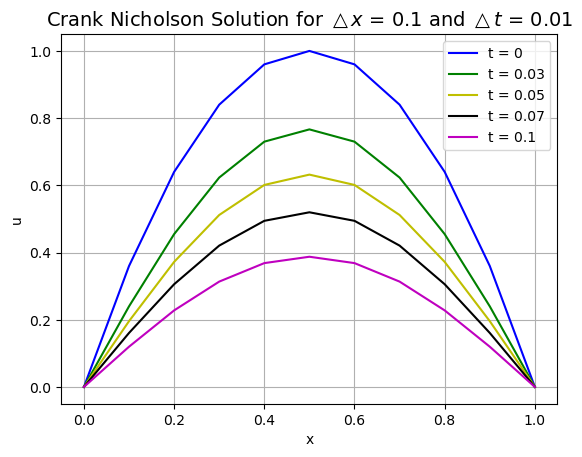

In [26]:
plt.title(rf"Crank Nicholson Solution for $\triangle x$ = {dx_5} and $\triangle t$ = {dt_5}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_5,u_5[0,:],c = 'b',label = 't = 0')
plt.plot(x_5,u_5[3,:],c = 'g',label = 't = 0.03')
plt.plot(x_5,u_5[5,:],c = 'y',label = 't = 0.05')
plt.plot(x_5,u_5[7,:],c = 'k',label = 't = 0.07')
plt.plot(x_5,u_5[10,:],c = 'm',label = 't = 0.1')
plt.legend()
plt.grid()
plt.show()

## Question 6
Solving the advection diffusion equation $$ u_t - 0.5u_x = u_{xx} + x(1 - x)$$
where the conditions are : 
1) Initial Condition :&ensp;$u(x,0) = 0.5(1 + e^{-x})$
2) Boundary Conditions :&ensp;$ u(0,t) = 1$&ensp;and&ensp;$u_x = 0$&ensp;at&ensp;$x = 1$ 

Using the **Operator Approach** $\implies$  \
The discretized equation is $$ u_i^{n+1} = \left(Fo - C \right)u_{i-1}^n + \left(1 - 2Fo + C \right)u_i^n + (Fo)u_{i+1}^n + x\left(1-x \right)(\triangle t)$$ \
The condition for stability &ensp;$\implies$&ensp;$\left(2Fo + C \right) \leq 1$ \
\
For &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.004$ \
$$ Fo = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{1 \times 0.004}{0.1^2} = \frac{0.004}{0.01} = 0.4$$
$$ C = \frac{a \triangle t}{\triangle x} = \frac{0.5 \times 0.004}{0.1} = 5 \times 0.004 = 0.02$$
$$ \left(2Fo + C \right) = 0.8 + 0.02 = 0.82 \leq 1$$ \
Hence the solution is stable.

In [27]:
def boundary_conditions_6(u, x):
    '''
    Inputs :- 
      u :: Solution Matrix 
      x :: Space domain
    '''
    u[:,0] = 1                          # left boundary

    u[0,:] = 0.5 * (1 + np.exp(-x))     # initial condition

    return u

In [28]:
dx_6 = 0.1
dt_6 = 0.004

a_6 = 0.5
alpha_6 = 1
Fo_6 = (alpha_6 * dt_6) / (dx_6)**2
C_6 = (a_6 * dt_6) / (dx_6)

x_start_6 = 0
x_end_6 = 1

t_start_6 = 0
t_end_6 = 1

nx_6 = int(np.round((x_end_6 - x_start_6) / dx_6)) + 1
nt_6 = int(np.round((t_end_6 - t_start_6) / dt_6)) + 1

x_6 = np.linspace(x_start_6,x_end_6,nx_6)
t_6 = np.linspace(t_start_6,t_end_6,nt_6)

print("The Courant Number is : ",C_6)
print("The Fourier Number is : ",Fo_6)

The Courant Number is :  0.02
The Fourier Number is :  0.3999999999999999


In [29]:
u_6 = np.zeros((nt_6, nx_6))
u_6 = boundary_conditions_6(u_6, x_6)

for i in range(nt_6 - 1):
    for j in range(1,nx_6 - 1):
        u_6[i + 1, j] = (Fo_6 - C_6) * u_6[i, j - 1] + (1 - 2*Fo_6 + C_6) * u_6[i, j] + (Fo_6) * u_6[i, j + 1] + x_6[j] * (1 - x_6[j]) * dt_6

    # using neumann boundary condition ghost point is found and substituted in the discretised equation.
    
    u_6[i + 1, -1] = (Fo_6 - C_6) * u_6[i, -2] + (1 - 2*Fo_6 + C_6) * u_6[i, -1] + (Fo_6) * u_6[i, -2] + x_6[-1] * (1 - x_6[-1]) * dt_6

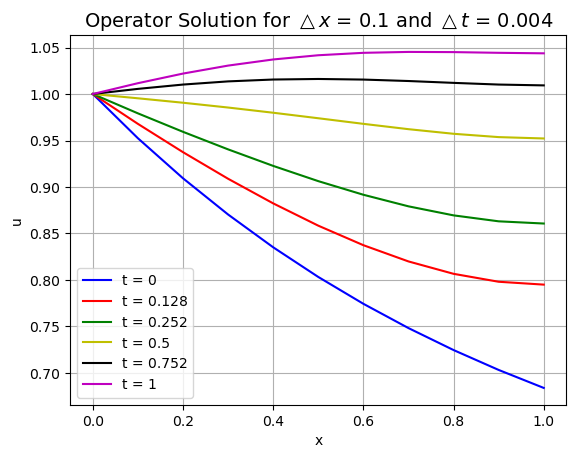

In [30]:
plt.title(rf"Operator Solution for $\triangle x$ = {dx_6} and $\triangle t$ = {dt_6}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_6,u_6[0,:],c = 'b',label = 't = 0')
plt.plot(x_6,u_6[32,:],c = 'r',label = 't = 0.128')
plt.plot(x_6,u_6[63,:],c = 'g',label = 't = 0.252')
plt.plot(x_6,u_6[125,:],c = 'y',label = 't = 0.5')
plt.plot(x_6,u_6[188,:],c = 'k',label = 't = 0.752')
plt.plot(x_6,u_6[250,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

Steady State Solution $\implies$ $$ u_{xx} + 0.5u_x + x(1 - x) = 0$$ \
The conditions are &ensp;$ u(0,t) = 1$&ensp;and&ensp;$u_x = 0$&ensp;at&ensp;$x = 1$ \
\
The discretized equation is $$ \left(1-k \right)u_{i-1} - 2u_i + \left(1 + k \right)u_{i+1} = \left(-(\triangle x)^2 x_i(1-x_i)\right)$$ 
where &ensp;$k = \frac{a \triangle x}{2}$

In [31]:
k = (a_6 * dx_6) / 2

A_6 = np.zeros((nx_6,nx_6))
b_6 = np.zeros((nx_6,1))

A_6[0,0] = 1
b_6[0,0] = 1

for i in range(1,nx_6 - 1):
    A_6[i, i - 1] = (1 - k)
    A_6[i, i] = -2
    A_6[i, i + 1] = (1 + k)

    b_6[i,0] = (-(dx_6)**2) * x_6[i] * (1 - x_6[i])

A_6[-1,-2] = 2
A_6[-1,-1] = -2
b_6[-1,0] = (-(dx_6)**2) * x_6[-1] * (1 - x_6[-1])

u_6_ss = np.linalg.solve(A_6,b_6)

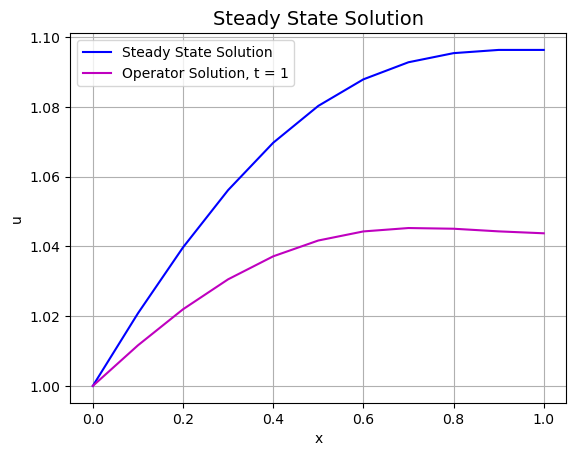

In [32]:
plt.title(rf"Steady State Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_6,u_6_ss,c = 'b',label = 'Steady State Solution')
plt.plot(x_6,u_6[250,:],c = 'm',label = 'Operator Solution, t = 1')
plt.legend()
plt.grid()
plt.show()

## Question 7
Solving the equation $$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + cos\left(\frac{\pi x}{2} \right)$$ \
where &ensp;$ 0 \leq x \leq 1$&ensp;and&ensp;$0 < t \leq 1$. \
\
The conditions given are : 
1) Initial Condition : The entire plate is at zero temperature &ensp;$\implies$&ensp;$u(x,0) = 0$
2) Boundary Condition : &ensp;$u(0,t) = 0$&ensp;and&ensp;$\frac{\partial u}{\partial x} + 0.5u^4 = 0$&ensp;at&ensp;$x = 1$

Using **FTCS** scheme &ensp;$\implies$ \
The discretized equation is $$ u_i^{n+1} = (Fo)u_{i-1}^n + (1 - 2Fo)u_i^n + (Fo)u_{i+1}^n + (\triangle t)cos\left(\frac{\pi x_i}{2} \right)$$ \
The condition for stability is &ensp;$Fo \leq 0.5$ \
\
For &ensp;$\triangle x = 0.1$&ensp;and&ensp;$\triangle t = 0.005$&ensp;$\implies$ $$ Fo = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{1 \times 0.005}{0.1^2} = 0.5$$ \
Hence the solution should be stable.

In [33]:
def boundary_conditions_7(u):
    '''
    Input :- u :: Matrix of solutions.
    '''
    u[:,0] = 0                           # Left Boundary 

    u[0,:] = 0                         # initial condition

    return u

In [34]:
dx_7 = 0.1
dt_7 = 0.005

alpha_7 = 1
Fo_7 = (alpha_7 * dt_7) / (dx_7)**2

x_start_7 = 0
x_end_7 = 1

t_start_7 = 0
t_end_7 = 1

nx_7 = int(np.round((x_end_7 - x_start_7) / dx_7)) + 1
nt_7 = int(np.round((t_end_7 - t_start_7) / dt_7)) + 1

x_7 = np.linspace(x_start_7,x_end_7,nx_7)
t_7 = np.linspace(t_start_7,t_end_7,nt_7)

print("The Fourier Number is : ",Fo_7)

The Fourier Number is :  0.4999999999999999


In [35]:
u_7 = np.zeros((nt_7,nx_7))
u_7 = boundary_conditions_7(u_7)

for i in range(nt_7 - 1):
    for j in range(1,nx_7 - 1):
        u_7[i + 1, j] = Fo_7 * u_7[i, j - 1] + (1 - 2*Fo_7) * u_7[i, j] + Fo_7 * u_7[i, j + 1] + dt_7 * (np.cos((np.pi * x_7[j])/2))

    # using robin bc, the ghost point is substituted in discretized equation.
    
    u_7[i + 1, -1] = 2 * Fo_7 * u_7[i, -2] + (1 - 2*Fo_7) * u_7[i, -1] + dt_7 * (np.cos((np.pi * x_7[-1])/2)) - dx_7 * Fo_7 * (u_7[i, -1]**4)

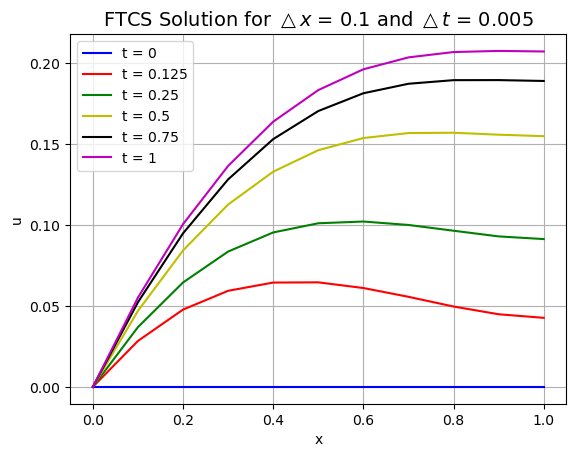

In [36]:
plt.title(rf"FTCS Solution for $\triangle x$ = {dx_7} and $\triangle t$ = {dt_7}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_7,u_7[0,:],c = 'b',label = 't = 0')
plt.plot(x_7,u_7[25,:],c = 'r',label = 't = 0.125')
plt.plot(x_7,u_7[50,:],c = 'g',label = 't = 0.25')
plt.plot(x_7,u_7[100,:],c = 'y',label = 't = 0.5')
plt.plot(x_7,u_7[150,:],c = 'k',label = 't = 0.75')
plt.plot(x_7,u_7[200,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

Since the scheme used is explicit, the non-linear term (in boundary condition) was solved in a regular way(time marching way) as the value at previous time step is known. 

## Question 8
Solving the Korteweg and de Vries equation $$ u_t - 6uu_{xx} + u_{xxx} = 0$$ \
The conditions are periodic &ensp;$\implies$ 
1) &ensp;$u(-8) = u(8)$
2) &ensp;$u'(-8) = u'(8)$
3) &ensp;$u^{"}(-8) = u^{"}(8)$
4) Initial Condition :&ensp;$u(x,0) = -8e^{-x^2}$

Using Taylor series $$ u_{xxx} = \frac{u_{i+2} - 2u_{i+1} + 2u_{i-1} - u_{i-2}}{2(\triangle x)^3}$$ \
Using **BTCS** scheme &ensp;$\implies$ the scheme is implicit. \
Since the equation contains a non linear term, it is not possible to solve in a regular way(by forming a matrix). Hence **Multi-variate Newton Raphson** Method is used to find the solutions. \
\
Roll Number - CO23BTECH110**21** \
Taking &ensp;$\triangle x = 0.1$&ensp; and &ensp;$\triangle t = 21 \times \left(5 \times 10^{-4} \right)$

In [37]:
def boundary_conditions_8(u, x):
    '''
    Inputs :- 
      u :: Solution Matrix 
      x :: Space domain
    '''
    u[0,:] = -8 * (np.exp(-x**2))        # initial condition

    return u

In [38]:
dx_8 = 0.1
dt_8 = 21 * 5 * 1e-4

x_start_8 = -8
x_end_8 = 8

t_start_8 = 0
t_end_8 = 2

nx_8 = int(np.round((x_end_8 - x_start_8) / dx_8)) + 1
nt_8 = int(np.round((t_end_8 - t_start_8) / dt_8)) + 1

x_8 = np.linspace(x_start_8,x_end_8,nx_8)
t_8 = np.linspace(t_start_8,t_end_8,nt_8)

In [39]:
def find_F(u_guess, u_prev, dx, dt):
    '''
    Finding the RHS function

    Inputs :-
      u_guess :: guess solution at a time step
      u_prev  :: converged solution at previous time step.
      dx      :: step size in space
      dt      :: step size in time
    '''
    n = len(u_guess)
    F = np.zeros(n)
    
    c1 = dt/dx
    c2 = dt/(2 * (dx**3))

    # separate case to handle periodic boundary conditions
    
    F[0] = (u_guess[0] - u_prev[0]) - 3*c1*u_guess[0]*(u_guess[1] - u_guess[-1]) + c2*(u_guess[2] - 2*u_guess[1] + 2*u_guess[-1] - u_guess[-2])
    F[1] = (u_guess[1] - u_prev[1]) - 3*c1*u_guess[1]*(u_guess[2] - u_guess[0]) + c2*(u_guess[3] - 2*u_guess[2] + 2*u_guess[0] - u_guess[-1])

    for i in range(2,n-2):
        F[i] = (u_guess[i] - u_prev[i]) - 3*c1*u_guess[i]*(u_guess[i+1] - u_guess[i-1]) + c2*(u_guess[i+2] - 2*u_guess[i+1] + 2*u_guess[i-1] - u_guess[i-2])

    F[-2] = (u_guess[-2] - u_prev[-2]) - 3*c1*u_guess[-2]*(u_guess[-1] - u_guess[-3]) + c2*(u_guess[0] - 2*u_guess[-1] + 2*u_guess[-3] - u_guess[-4])
    F[-1] = (u_guess[-1] - u_prev[-1]) - 3*c1*u_guess[-1]*(u_guess[0] - u_guess[-2]) + c2*(u_guess[1] - 2*u_guess[0] + 2*u_guess[-2] - u_guess[-3])

    return F

In [40]:
def find_J(u_guess, u_prev, dx, dt):
    '''
    Finding Jacobian Matrix

    Inputs :- 
      Same as find_F function
    '''
    
    n = len(u_guess)
    J = np.zeros((n,n))

    c1 = dt/dx
    c2 = dt/(2 * (dx**3))

    J[0,-2] = -c2
    J[0,-1] = 3*c1*u_guess[0] + 2*c2
    J[0,0] = 1 - 3*c1*(u_guess[1] - u_guess[-1])
    J[0,1] = -3*c1*u_guess[0] - 2*c2
    J[0,2] = c2

    J[1,-1] = -c2
    J[1,0] = 3*c1*u_guess[1] + 2*c2
    J[1,1] = 1 - 3*c1*(u_guess[2] - u_guess[0])
    J[1,2] = -3*c1*u_guess[1] - 2*c2
    J[1,3] = c2

    for i in range(2,n-2):
        J[i,i-2] = -c2
        J[i,i-1] = 3*c1*u_guess[i] + 2*c2
        J[i,i] = 1 - 3*c1*(u_guess[i+1] - u_guess[i-1])
        J[i,i+1] = -3*c1*u_guess[i] - 2*c2
        J[i,i+2] = c2

    J[-2,-4] = -c2
    J[-2,-3] = 3*c1*u_guess[-2] + 2*c2
    J[-2,-2] = 1 - 3*c1*(u_guess[-1] - u_guess[-3])
    J[-2,-1] = -3*c1*u_guess[-2] - 2*c2
    J[-2,0] = c2

    J[-1,-3] = -c2
    J[-1,-2] = 3*c1*u_guess[-1] + 2*c2
    J[-1,-1] = 1 - 3*c1*(u_guess[0] - u_guess[-2])
    J[-1,0] = -3*c1*u_guess[-1] - 2*c2
    J[-1,1] = c2

    return J

In [41]:
u_8 = np.zeros((nt_8,nx_8))
u_8 = boundary_conditions_8(u_8, x_8)

tol = 1e-6
max_iter = 1000

for i in range(nt_8 - 1):

    u_guess = u_8[i,:].copy() + 0.01 * np.random.randn(nx_8)
    
    for j in range(max_iter):    
        F = find_F(u_guess, u_8[i,:], dx_8, dt_8)
        J = find_J(u_guess, u_8[i,:], dx_8, dt_8)
    
        dx = np.linalg.solve(J,-F)
    
        u_guess += dx
    
        if (np.linalg.norm(dx) <= tol):
            u_8[i+1,:] = u_guess
            break
            
        elif (j == max_iter):
            print(f"Warning: Newton iteration did not converge at time step {i}")
            u_8[i+1,:] = u_guess  

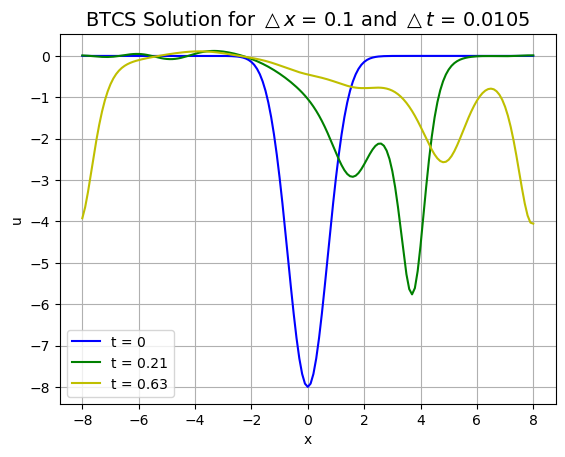

In [42]:
plt.title(rf"BTCS Solution for $\triangle x$ = {dx_8} and $\triangle t$ = {dt_8}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_8,u_8[0,:],c = 'b',label = 't = 0')
plt.plot(x_8,u_8[20,:],c = 'g',label = 't = 0.21')
plt.plot(x_8,u_8[60,:],c = 'y',label = 't = 0.63')
plt.legend()
plt.grid()
plt.show()

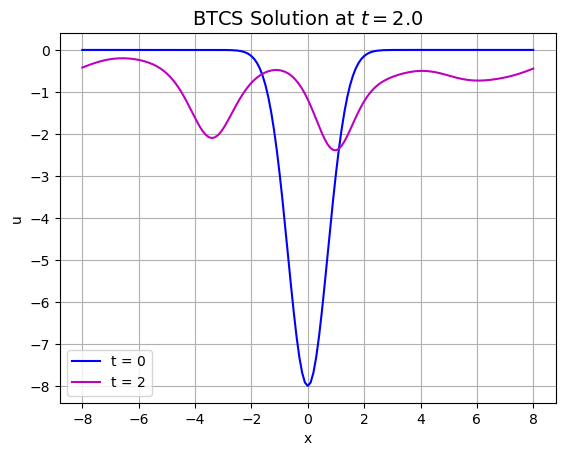

In [43]:
plt.title(rf"BTCS Solution at $t = {t_8[190]}$",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x_8,u_8[0,:],c = 'b',label = 't = 0')
plt.plot(x_8,u_8[190,:],c = 'm',label = 't = 2')
plt.legend()
plt.grid()
plt.show()

## Question 9
Solving the 2D heat equation $$ \frac{\partial u}{\partial t} = \alpha \left(\frac{\partial^2 u}{\partial \xi^2} + \frac{\partial^2 u}{\partial \eta^2}\right)$$ \
where the square region is defined with the corners &ensp;$\left(\xi = 0,\eta = 0\right)$&ensp;and&ensp;$\left(\xi = 1,\eta = 1\right)$. \
The conditions given are :
1) Initial Condition : &ensp;$u = 1$&ensp; throughout the domain.
2) Boundary Conditions :
   &ensp;$u = 0$&ensp;at left and bottom sides and &ensp;$\alpha \frac{\partial u}{\partial \eta} + c_1u = c_2$&ensp;at top side. \
**NOTE** : Since the boundary condition at right side is not mentioned, **Dirichlet condition of u = 0** taken at that end.

The values of constants are :&ensp;$\alpha = 1$&ensp;and&ensp;$c_1 = c_2 = 0.5$. \
Roll Number - CO23BTECH110**21** <br> 
Odd Number &ensp;$\implies$&ensp;Using **FTCS** scheme \
The discretized equation is $$ u_{i,j}^{n+1} = Fo_x\left(u_{i-1,j}^n + u_{i+1,j}^n \right) + Fo_y\left(u_{i,j-1}^n + u_{i,j+1}^n \right) + (1 - 2Fo_x - 2Fo_y)u_{i,j}^n$$ \
The condition for stability is &ensp;$\implies$&ensp;$\left(Fo_x + Fo_y \right) \leq 0.5$ \
\
For &ensp;$\triangle x = \triangle y = 0.1$&ensp;and&ensp;$\triangle t = 0.0025$ \
$$ Fo_x = \frac{\alpha \triangle t}{(\triangle x)^2} = \frac{1 \times 0.0025}{0.1^2} = \frac{0.0025}{0.01} = 0.25$$ 
$$ Fo_y = \frac{\alpha \triangle t}{(\triangle y)^2} = \frac{1 \times 0.0025}{0.1^2} = \frac{0.0025}{0.01} = 0.25$$ 
$$ \left(Fo_x + Fo_y \right) = 0.25 + 0.25 = 0.5$$ \
Hence the solution is stable.

In [44]:
def boundary_conditions_9(u):
    '''
    Inputs :- 
      u :: 3D Solution Matrix 
    '''
    u[0] = 1             # initial condition

    u[1:,0,:] = 0        # bottom boundary

    u[1:,:,0] = 0        # left boundary

    u[1:,-1,1:] = 0      # right boundary

    return u

In [45]:
dx_9 = 0.1
dy_9 = 0.1
dt_9 = 0.0025

alpha_9 = 1
Fo_x_9 = (alpha_9 * dt_9) / (dx_9)**2
Fo_y_9 = (alpha_9 * dt_9) / (dy_9)**2

x_start_9 = 0
x_end_9 = 1

y_start_9 = 0
y_end_9 = 1

t_start_9 = 0
t_end_9 = 1

nx_9 = int(np.round((x_end_9 - x_start_9) / dx_9)) + 1
ny_9 = int(np.round((y_end_9 - y_start_9) / dy_9)) + 1
nt_9 = int(np.round((t_end_9 - t_start_9) / dt_9)) + 1

x_9 = np.linspace(x_start_9,x_end_9,nx_9)
y_9 = np.linspace(y_start_9,y_end_9,ny_9)
t_9 = np.linspace(t_start_9,t_end_9,nt_9)

print("The Fourier Number in x is : ",Fo_x_9)
print("The Fourier Number in y is : ",Fo_y_9)

The Fourier Number in x is :  0.24999999999999994
The Fourier Number in y is :  0.24999999999999994


In [46]:
u_9 = np.zeros((nt_9,nx_9,ny_9))
u_9 = boundary_conditions_9(u_9)

for i in range(nt_9 - 1):
    for j in range(1, nx_9 - 1):
        for k in range(1,ny_9 - 1):
            u_9[i+1,j,k] = Fo_x_9 * (u_9[i,j-1,k] + u_9[i,j+1,k]) + Fo_y_9 * (u_9[i,j,k-1] + u_9[i,j,k+1]) + (1 - 2*(Fo_x_9 + Fo_y_9)) * u_9[i,j,k]

        # using robin bc at the top row
        
        u_9[i+1,j,-1] = Fo_x_9 * (u_9[i,j-1,k] + u_9[i,j+1,k]) + Fo_y_9 * (2*u_9[i,j,k-1] + 1 - u_9[i,j,k] ) + (1 - 2*(Fo_x_9 + Fo_y_9)) * u_9[i,j,k]

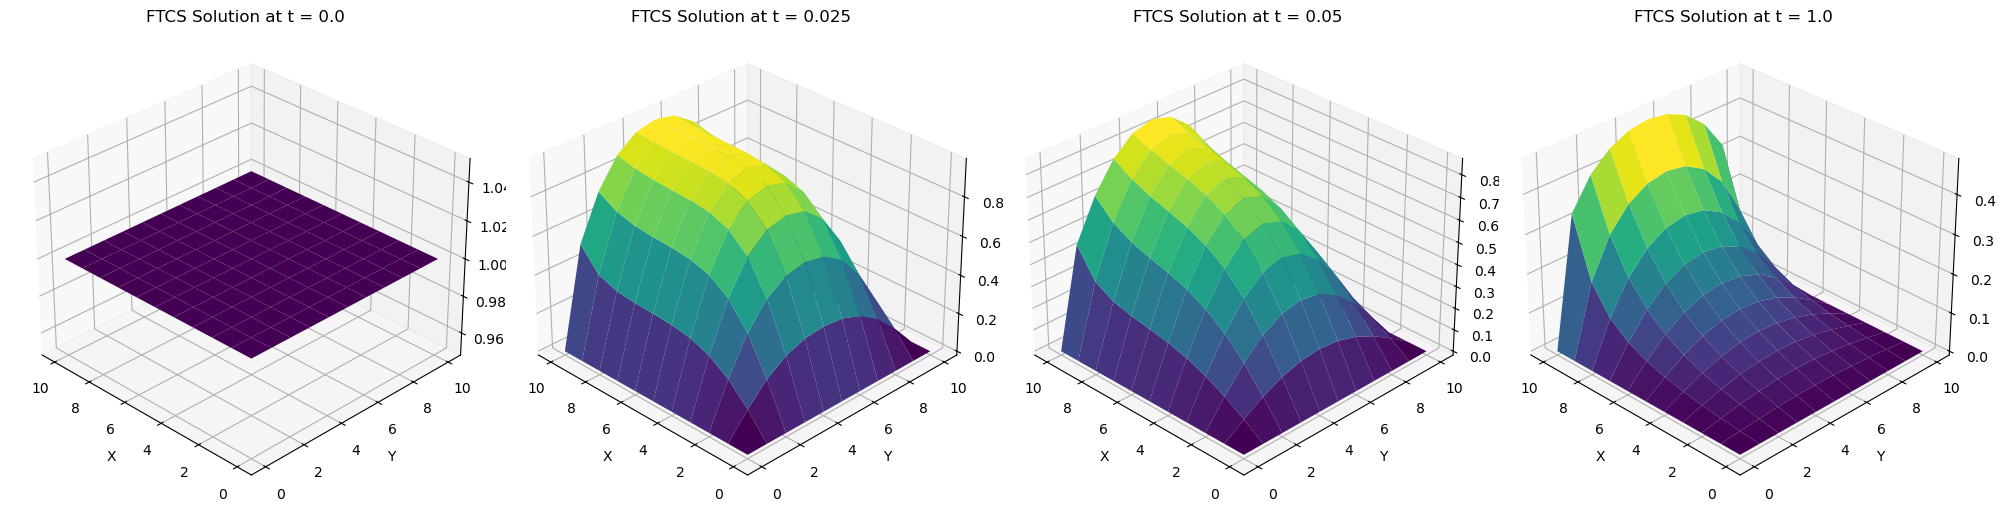

In [47]:
y = np.arange(nx_9)
x = np.arange(ny_9)
X, Y = np.meshgrid(x, y)

times = [0, 10, 20, 400]

fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": "3d"})

for ax, t in zip(axes, times):
    surf = ax.plot_surface(X, Y, u_9[t], cmap='viridis', edgecolor='none')
    ax.set_title(f"FTCS Solution at t = {t_9[t]}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u')
    ax.invert_yaxis()
    ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()


## Question 10
Solving semi infinite heat conduction equation $$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}$$ \
The non dimensional form is $$ \frac{\partial u}{\partial \tau} = \frac{\partial^2 u}{\partial \xi^2}$$ \
Taking the conditions as : 
1) Initial Condition : &ensp;$u(x,0) = 0$
2) Boundary Conditions : &ensp;$u(0,t) = 1$ \
**NOTE**: Since the condition at other end(infinitely large) is not given, taking the condition&ensp;$\frac{\partial u}{\partial x} = 0$&ensp;at&ensp;$x = L$

Taking some large value of &ensp;$L = 10$&ensp; and solving the non dimensionalised equation using **Crank Nicholson**&ensp;$\implies$

In [48]:
def boundary_conditions_10(u):
    '''
    Inputs :- 
      u :: Solution Matrix 
    '''
    u[0,:] = 0             # initial condition

    u[:,0] = 1             # left boundary

    return u

In [49]:
deps_10 = 0.1
dt_10 = 0.004

alpha_10 = 1
Fo_10 = (alpha_10 * dt_10)/(deps_10 ** 2)

eps_start_10 = 0
eps_end_10 = 1                  # eps = x/L which at the infinite end is 1

t_start_10 = 0
t_end_10 = 0.05

neps_10 = int(np.round((eps_end_10 - eps_start_10) / deps_10)) + 1
nt_10 = int(np.round((t_end_10 - t_start_10) / dt_10)) + 1

eps_10 = np.linspace(eps_start_10,eps_end_10,neps_10)
t_10 = np.linspace(t_start_10,t_end_10,nt_10)

print("The Fourier Number is : ",Fo_10)

The Fourier Number is :  0.3999999999999999


In [50]:
u_10 = np.zeros((nt_10,neps_10))
u_10 = boundary_conditions_10(u_10)

A_10 = np.zeros((neps_10,neps_10))
B_10 = np.zeros((neps_10,neps_10))

A_10[0,0] = 1
B_10[0,0] = 1

for i in range(1,neps_10 - 1):
    A_10[i,i-1] = -Fo_10/2
    A_10[i,i] = (1 + Fo_10)
    A_10[i,i+1] = -Fo_10/2
    
    B_10[i,i-1] = Fo_10/2
    B_10[i,i] = (1 - Fo_10)
    B_10[i,i+1] = Fo_10/2

A_10[-1,-2] = -Fo_10
A_10[-1,-1] = (1 + Fo_10)

B_10[-1,-2] = Fo_10
B_10[-1,-1] = (1 - Fo_10)

In [51]:
for i in range(nt_10 - 1):
    constant = B_10 @ (u_10[i,:].T)
    sol = np.linalg.solve(A_10,constant)
    u_10[i + 1,:] = sol.T

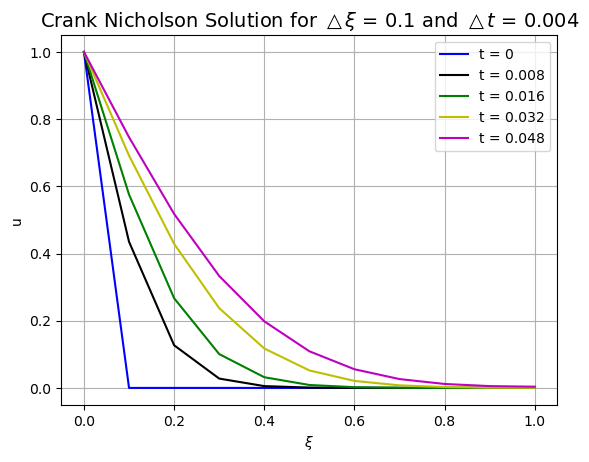

In [52]:
plt.title(rf"Crank Nicholson Solution for $\triangle \xi$ = {deps_10} and $\triangle t$ = {dt_10}",fontsize = 14)
plt.xlabel(r'$\xi$')
plt.ylabel('u')
plt.plot(eps_10,u_10[0,:],c = 'b',label = 't = 0')
plt.plot(eps_10,u_10[2,:],c = 'k',label = 't = 0.008')
plt.plot(eps_10,u_10[4,:],c = 'g',label = 't = 0.016')
plt.plot(eps_10,u_10[8,:],c = 'y',label = 't = 0.032')
plt.plot(eps_10,u_10[12,:],c = 'm',label = 't = 0.048')
plt.legend()
plt.grid()
plt.show()

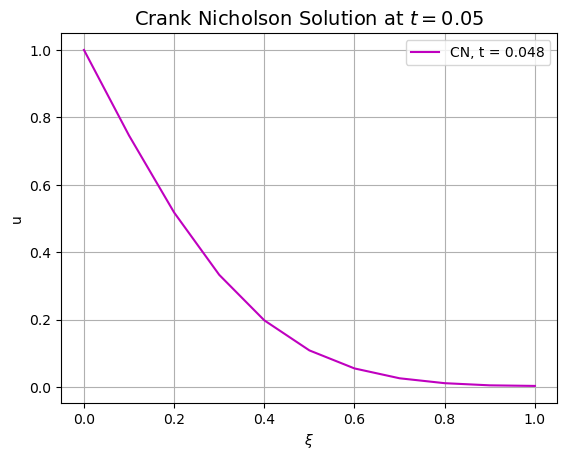

In [53]:
plt.title(rf"Crank Nicholson Solution at $t = {t_10[12]}$",fontsize = 14)
plt.xlabel(r'$\xi$')
plt.ylabel('u')
plt.plot(eps_10,u_10[12,:],c = 'm',label = 'CN, t = 0.048')
plt.legend()
plt.grid()
plt.show()

**Observation** \
The solution is converging to the **exponential decay** function as the length approaches infinity(infinitely large).